We consider the handwritten digits dataset from : https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits

We use this to see the efects of performing various PCA on pairs of subsets.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

import tdqual.topological_data_quality_0 as tdq

digits = datasets.load_digits()

import os
plots_dir="plots/digits_PCA/"
os.makedirs(plots_dir, exist_ok=True)

digits.data.shape

(1797, 64)

In [2]:
len(digits.target)

1797

In [3]:
np.array(digits.target)

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
index_0 = np.nonzero(np.array(digits.target)==0)[0]
index_8 = np.nonzero(np.array(digits.target)==8)[0]
index_9 = np.nonzero(np.array(digits.target)==9)[0]
# Look at point clouds 
X_0 = digits.data[index_0]
X_8 = digits.data[index_8]
X_9 = digits.data[index_9]

Consider the sample of classes $0$ and $8$ as well as the example with classes $0$ and $9$

In [5]:
X_09 = np.vstack([X_0, X_9])

Now, we use PCA in both samples.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Y_0 = pca.fit_transform(X_0)
pca = PCA(n_components=2)
Y_09 = pca.fit_transform(X_09)

Now, we plot the point clouds in dimension $0$.

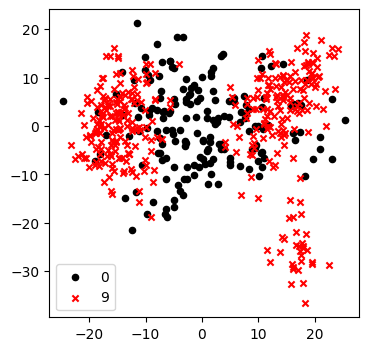

In [7]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(Y_0[:,0], Y_0[:,1], c="black", marker="o", s=20, label="0")
ax.scatter(Y_09[:,0], Y_09[:,1], c="red", marker="x", s=20, label="9")
plt.legend()
plt.savefig(plots_dir + "digits_09_dim_2.png")

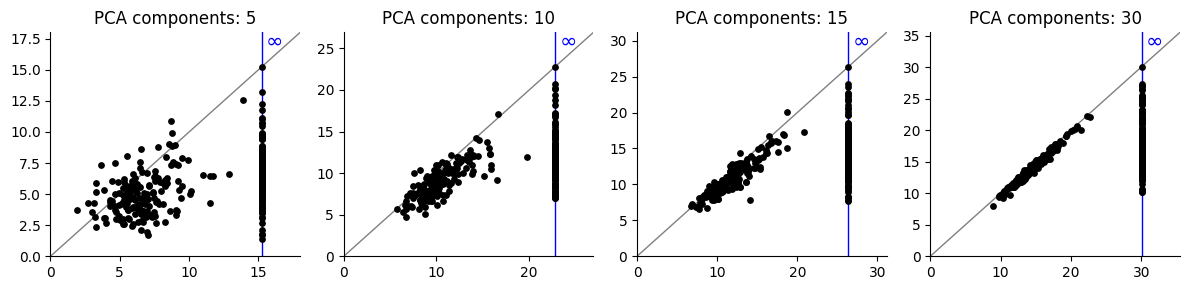

In [8]:
fig, ax = plt.subplots(figsize=(12,3), ncols=4)
for i, dim in enumerate([5,10,15,30]):
    # Dim reduction
    pca = PCA(n_components=dim)
    Y_0 = pca.fit_transform(X_0)
    pca = PCA(n_components=dim)
    Y_09 = pca.fit_transform(X_09)
    # Compute matching diagram and plot
    filt_X, filt_Z, matching = tdq.compute_Mf_0(Y_0, Y_09)
    D_f, multiplicities = tdq.compute_matching_diagram(filt_X, filt_Z, matching, _tol=1e-5)
    tdq.plot_matching_diagram(D_f, ax[i])
    ax[i].set_title(f"PCA components: {dim}")
# end for 
plt.tight_layout()
plt.savefig(plots_dir + "matching_PCA.png")

Now, we do the same for the case when there is a partial matching $X\nrightarrow Y$.

In [10]:
X_08 = np.vstack([X_0, X_8])

In [51]:
n=50
pca = PCA(n_components=n)
Y_08 = pca.fit_transform(X_08)
pca = PCA(n_components=n)
Y_09 = pca.fit_transform(X_09)

In [52]:
# Compute TMT of both X and Y (Y_08 and Y_09)
filtration_list_X, pairs_arr_X = tdq.mst_edge_filtration(Y_08) # MST(X)
filtration_list_Y, pairs_arr_Y = tdq.mst_edge_filtration(Y_09) # MST(Y)
TMT_X_pairs = tdq.compute_tmt_pairs(filtration_list_X, pairs_arr_X)
TMT_Y_pairs = tdq.compute_tmt_pairs(filtration_list_Y, pairs_arr_Y)
# Take indices of triplets with common vertices (X_0)
indices_X_comm = np.max(TMT_X_pairs, axis=1)<X_0.shape[0]
indices_Y_comm = np.max(TMT_Y_pairs, axis=1)<X_0.shape[0]
TMT_X_comm_pairs = TMT_X_pairs[indices_X_comm]
TMT_Y_comm_pairs = TMT_Y_pairs[indices_Y_comm]
# Compute matching
Fcomm = tdq.get_inclusion_matrix(TMT_X_comm_pairs, TMT_Y_comm_pairs) # Associated matrix
matching_comm = tdq.get_inclusion_matrix_pivots(Fcomm, X_0.shape[0]) # Matching in TMT_X_Z
# Recover global indices
indices_X_comm = np.nonzero(indices_X_comm)[0]
indices_Y_comm = np.nonzero(indices_Y_comm)[0]
matching =[[indices_X_comm[i], indices_Y_comm[j]] for i,j in enumerate(matching_comm)] # Matching in all TMT_Z
matching = np.array(matching)

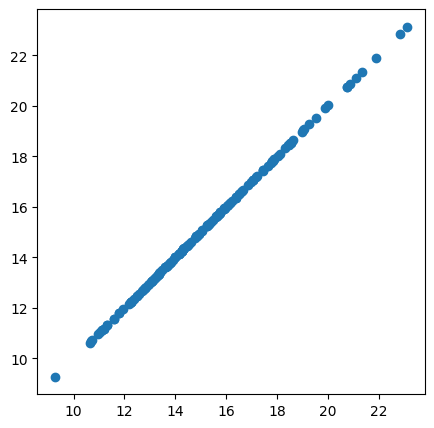

In [53]:
filt_X = np.array(filtration_list_X)
filt_Y = np.array(filtration_list_Y)
fig, ax = plt.subplots(figsize=(5,5))
M_O = np.vstack([filt_X[matching[:,0]], filt_Y[matching[:,1]]]).transpose()
ax.scatter(M_O[:,0], M_O[:,1])
plt.show()